In [1]:
require 'image' ;
require 'nn';
require 'optim';
require 'gnuplot';

In [2]:
torch.setdefaulttensortype('torch.FloatTensor')
mlp = nn.Sequential();
c = nn.Parallel(1,1)

In [3]:
for i=1,10 do
    local net=nn.Sequential()
    net:add(nn.SpatialConvolution(3, 6, 5, 5)) 
    net:add(nn.ReLU())                       
    net:add(nn.SpatialMaxPooling(2,2,2,2))
    net:add(nn.SpatialConvolution(6, 16, 5, 5))
    net:add(nn.ReLU())         
    net:add(nn.SpatialMaxPooling(2,2,2,2))
    net:add(nn.SpatialConvolution(16, 28, 5, 5))
    net:add(nn.ReLU())
    net:add(nn.SpatialMaxPooling(2,2,2,2))
    net:add(nn.View(28*3*3))
    c:add(net)
end
mlp:add(c)
mlp:add(nn.Linear(2520,1000))
mlp:add(nn.Dropout())
mlp:add(nn.Linear(1000,400))
mlp:add(nn.Linear(400,50))
mlp:add(nn.SoftMax())

In [4]:
x = torch.rand(10,3,52,52)
print(x:type())
y = mlp:forward(x)
print(y:size())

torch.FloatTensor	


 50
[torch.LongStorage of size 1]



In [10]:
data = torch.load('patched-data-train(52x52).t7')

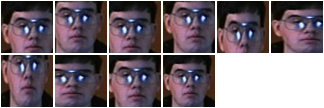

In [16]:
itorch.image(data.data[400])

In [30]:
q = torch.Tensor(50)
for i=1,50 do
    q[i] = i
end
for i=1,50 do
    f = 0
    for j =1,600 do
        s = data.class[j]
        if(s == i) then f = 1 end
    end
    if(f == 0) then print(i) end
end

In [17]:
data.data:size()

 400
  10
   3
  52
  52
[torch.LongStorage of size 5]

